In [1]:
#Importing relevant libraries
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
#from pandas.tools.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell
import imblearn

InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import the dataset as a pandas dataframe
bank_df = pd.read_csv("bank-full.csv",sep=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Peeking at the datasets
bank_df.tail()
bank_df.info()
print('_'*40)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
________________________________________


In [4]:
#Change the name of the last column to be classified from y to subscribed
bank_df = bank_df.rename(columns={'y': 'subscribed'})

- There are 10 object features: Job, Marital, Education, Default, Housing, Loan, Contact, Month, poutcome, subscribed
  * Job is category
  * Marital is category
  * Education is category
  * default is binary category
  * Housing is binary category
  * Loan is binary category
  * Contact is category
  * Month is category
  * poutcome is category
  * Subscribed is binary category
- There are 7 numerical features: age, balance, day, duration, campaign, pdays, previous
  * Age, balance, day, duration, campaign, pdays and previous are continuous

In [5]:
#Get the column counts
bank_df.count()

age           45211
job           45211
marital       45211
education     45211
default       45211
balance       45211
housing       45211
loan          45211
contact       45211
day           45211
month         45211
duration      45211
campaign      45211
pdays         45211
previous      45211
poutcome      45211
subscribed    45211
dtype: int64

In [6]:
#Return columns with null values
print('Columns with null values:',bank_df.isnull().sum(), sep = '\n')
print("-"*42)

Columns with null values:
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64
------------------------------------------


In [7]:
#Describe the entire dataset
bank_df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


## Exploratory Data Analysis(EDA)

Through the EDA, the data will be described using statistical and visualisation techniques to highlight important aspects of the data. This is a broad process which involves describing, summarising and looking at the data from different perspectives. 

The objectives of this EDA process are:
- To identify different relationships between the attributes of the data
- Identify the underlying structure of the dataset
- To provide context around the problem 

#### Detailed description of the dataframe

In [8]:
#Function to perform a more detailed description of variables
def examine_data(df):
    for name in df.columns:
        print("-"*30)
        print(df[name].dtype)
        if df[name].dtype is np.dtype('O'):
            print(df[name].value_counts())
            print("Column Name: ", name)
        else:
            print(df[name].describe())

In [9]:
examine_data(bank_df)

------------------------------
int64
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64
------------------------------
object
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Column Name:  job
------------------------------
object
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Column Name:  marital
------------------------------
object
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Column Name:  education
------------------------------
object
no     44396
yes      815
Name: default, dtype: int64
Column Name:  d

In [10]:
#Obtain the different unique values of every attribute
bank_df.marital.unique()
bank_df.job.unique()
bank_df.education.unique()
bank_df.default.unique()
bank_df.housing.unique()
bank_df.loan.unique()
bank_df.contact.unique()
bank_df.month.unique()
bank_df.poutcome.unique()

array(['married', 'single', 'divorced'], dtype=object)

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['yes', 'no'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['unknown', 'cellular', 'telephone'], dtype=object)

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

array(['unknown', 'failure', 'other', 'success'], dtype=object)

#### Subscriber count
The subscriber count will portray the distribution of customer subscription through the dataset

[Text(0, 0, 'Not subscribed'), Text(0, 0, 'Subscribed')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Count of subscribers')

Text(0.0, 19961.0, '39922(88%)')

Text(1.0, 2644.5, '5289(12%)')

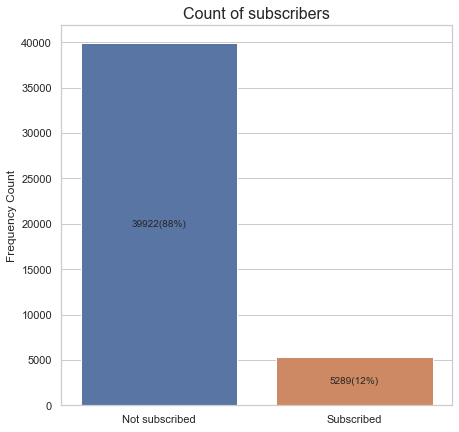

In [11]:
#Get the subscriber count and plot the distribution on a bar chart
figure, subscribe_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= bank_df["subscribed"].value_counts().index, y = bank_df["subscribed"].value_counts(), ax = subscribe_bar)
subscribe_bar.set_xticklabels(['Not subscribed', 'Subscribed'])
subscribe_bar.set_ylabel('Frequency Count')
subscribe_bar.set_title('Count of subscribers', fontsize = 16)

for patch in subscribe_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  
    label_y = patch.get_y() + patch.get_height()/2
    subscribe_bar.text(label_x, label_y,
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(bank_df.subscribed))+')',
               horizontalalignment='center', verticalalignment='center')

The above chart shows that only 12% of the customers subscribed to a term loan. There is a severe skew in the class distribution and this makes the dataset imbalanced. An imbalanced dataset can lead to an Accuracy Paradox which is a scenario in which the accuracy is only reflecting the underlying class distribution. 

There are various ways of handling a imbalanced dataset. In this case, we will be randomly resampling the dataset. Since the dataset is quite abundant, we will be undersampling during the creation of the ML model by deleting random instances of the over-represented class.

### Visualize the distributions of the individual variables

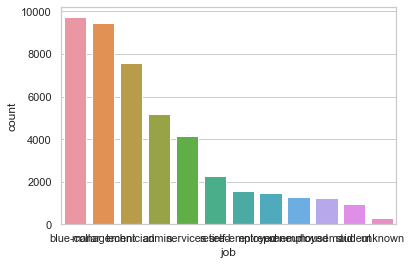

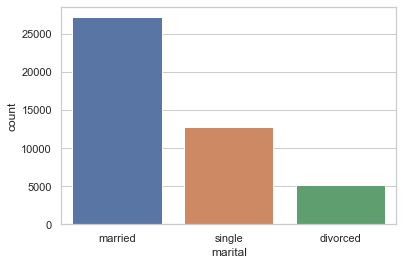

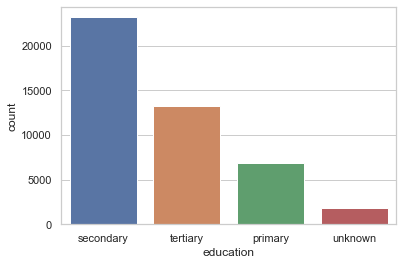

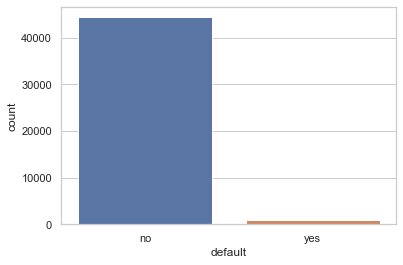

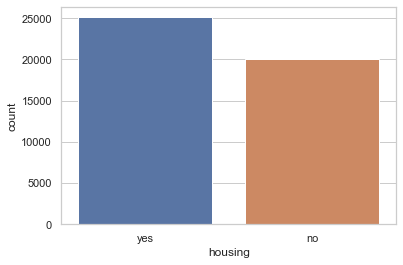

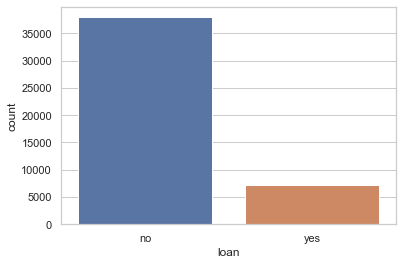

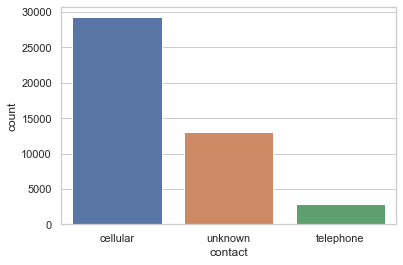

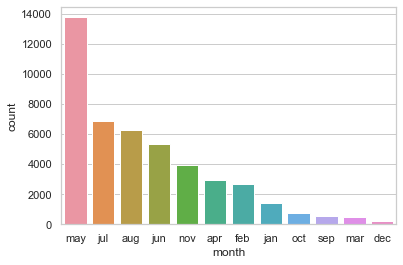

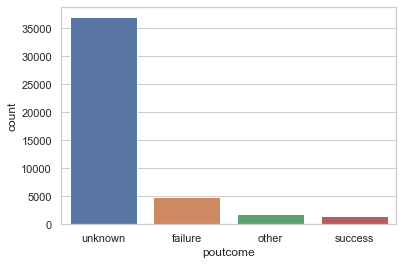

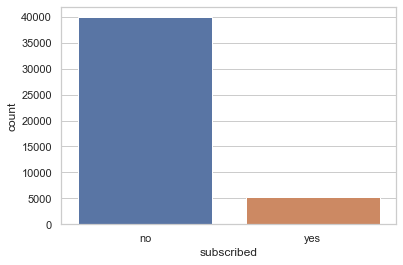

In [12]:
for feature in bank_df.dtypes[bank_df.dtypes == 'object'].index:
    sns.countplot(x=feature, data=bank_df, order = bank_df[feature].value_counts().index)
    plt.show()

### Plot the distribution of categorical features

Text(0.5, 0, '')

Text(0.5, 1.0, 'subscribed')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'job')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'marital')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'education')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'default')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'contact')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'housing')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'loan')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'month')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'poutcome')

Text(0, 0.5, 'Count')

Text(0.0, 19961.0, '39922(88%)')

Text(1.0, 2644.5, '5289(12%)')

Text(0.0, 4866.0, '9732(22%)')

Text(1.0, 4729.0, '9458(21%)')

Text(2.0, 3798.5, '7597(17%)')

Text(3.0, 2585.5, '5171(11%)')

Text(4.0, 2077.0, '4154(9%)')

Text(5.0, 1132.0, '2264(5%)')

Text(6.0, 789.5, '1579(3%)')

Text(7.0, 743.5, '1487(3%)')

Text(8.0, 651.5, '1303(3%)')

Text(9.0, 620.0, '1240(3%)')

Text(10.0, 469.0, '938(2%)')

Text(11.0, 144.0, '288(1%)')

Text(0.0, 13607.0, '27214(60%)')

Text(1.0, 6395.0, '12790(28%)')

Text(2.0, 2603.5, '5207(12%)')

Text(0.0, 11601.0, '23202(51%)')

Text(1.0, 6650.5, '13301(29%)')

Text(2.0, 3425.5, '6851(15%)')

Text(3.0, 928.5, '1857(4%)')

Text(0.0, 22198.0, '44396(98%)')

Text(1.0, 407.5, '815(2%)')

Text(0.0, 14642.5, '29285(65%)')

Text(1.0, 6510.0, '13020(29%)')

Text(2.0, 1453.0, '2906(6%)')

Text(0.0, 12565.0, '25130(56%)')

Text(1.0, 10040.5, '20081(44%)')

Text(0.0, 18983.5, '37967(84%)')

Text(1.0, 3622.0, '7244(16%)')

Text(0.0, 6883.0, '13766(30%)')

Text(1.0, 3447.5, '6895(15%)')

Text(2.0, 3123.5, '6247(14%)')

Text(3.0, 2670.5, '5341(12%)')

Text(4.0, 1985.0, '3970(9%)')

Text(5.0, 1466.0, '2932(6%)')

Text(6.0, 1324.5, '2649(6%)')

Text(7.0, 701.5, '1403(3%)')

Text(8.0, 369.0, '738(2%)')

Text(9.0, 289.5, '579(1%)')

Text(10.0, 238.5, '477(1%)')

Text(11.0, 107.0, '214(0%)')

Text(0.0, 18479.5, '36959(82%)')

Text(1.0, 2450.5, '4901(11%)')

Text(2.0, 920.0, '1840(4%)')

Text(3.0, 755.5, '1511(3%)')

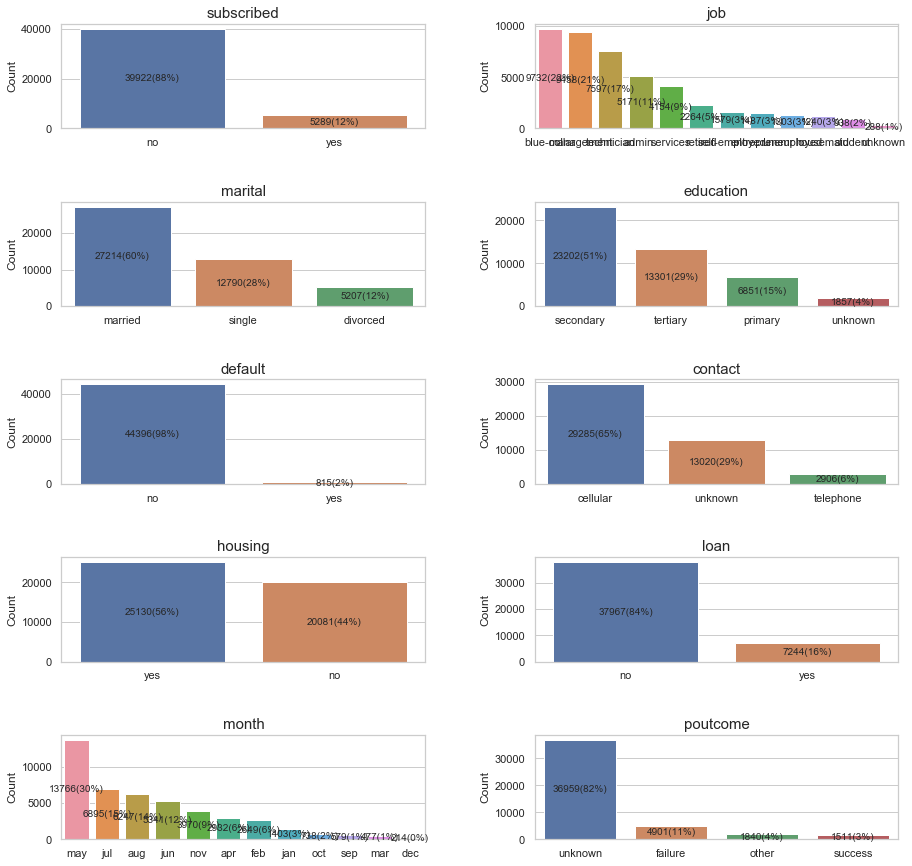

In [13]:
fig, myplot = plt.subplots(figsize = (15,15), nrows = 5,ncols = 2)

categorical_features = ["subscribed","job","marital","education","default","contact","housing","loan","month","poutcome"]

row, col, num_cols = 0,0,2

for u in categorical_features:
    sns.barplot(x = bank_df[u].value_counts().index,y = bank_df[u].value_counts(), ax  = myplot[row, col])
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u, fontsize = 15)
    myplot[row, col].set_ylabel("Count")
    col = col + 1
    if col == 2:
        col = 0
        row = row + 1
plt.subplots_adjust(hspace = 0.7)
plt.subplots_adjust(wspace = 0.3)

#for each patch in each graph from [0,0] to [1,2], we want to do the following...
for v in range(5):
    for z in range(2):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
            label_y = patch.get_y() + patch.get_height()/2
            myplot[v,z].text(label_x, label_y, 
                             str(int(patch.get_height())) + '('+'{:.0%}'.format(patch.get_height()/len(bank_df.subscribed))+')',
                            horizontalalignment='center', verticalalignment='center')

#### Age Distribution

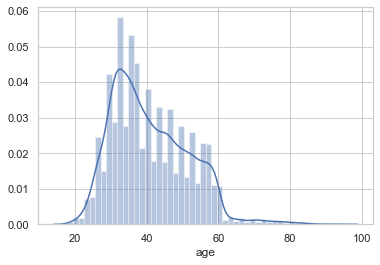

In [14]:
preimputation = bank_df.age
sns.distplot(preimputation)
#here we show a distribution of ages before imputation

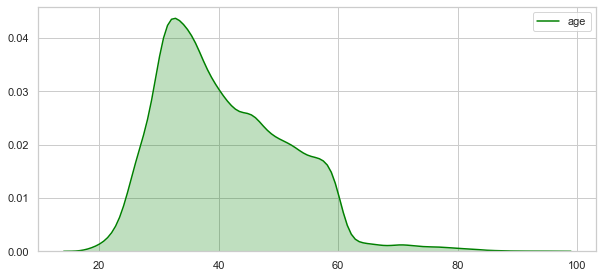

In [15]:
# Explore Age distibution as a whole
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=bank_df["age"], kernel='gau', ax=myaxis, color="Green", shade=True, legend=True)

#### Correlation heatmap
The correlation heatmap is used to visualize which variables are more correlated with each other. This can help in predicting one attribute from another. So since some categorical variables are not inside this map, we need to view their correlation with the other variables seperately.

(7, 0)

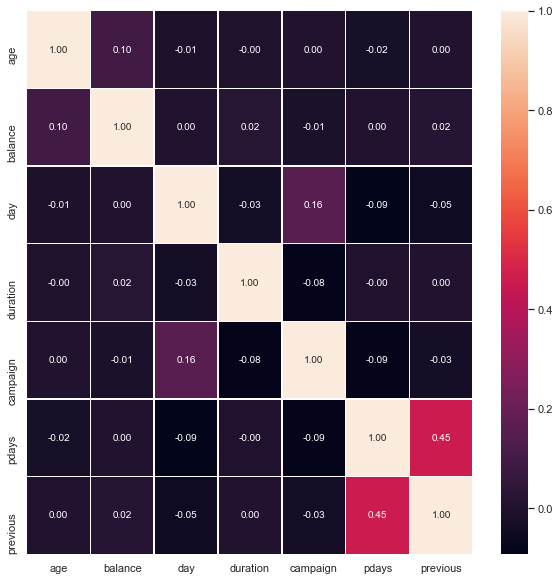

In [16]:
#Heatmap to observe correlation
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(bank_df.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

### Plotting individual variables against the variable to be classified

In [17]:
def percentage_subscribed(col_name):
    frequency = bank_df[bank_df['subscribed'] == 'yes'].groupby(col_name)['subscribed'].value_counts().to_frame('percentage')
    print(frequency/bank_df['subscribed'].value_counts().sum() * 100)

In [18]:
#convert the class from a binary categorical to a binary numerical column
bank_df['subscribed'] = bank_df['subscribed'].replace({'yes':1, 'no':0})

#### Marital status against the subcription class

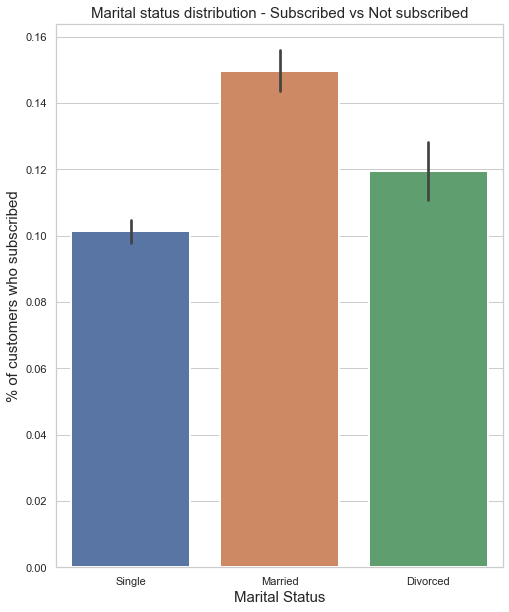

In [19]:
figure, marital_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "marital", 
            y = "subscribed", 
            estimator = np.mean,
            data=bank_df, 
            ax = marital_bar,
            linewidth=2)
marital_bar.set_title("Marital status distribution - Subscribed vs Not subscribed", fontsize = 15)
marital_bar.set_xlabel("Marital Status", fontsize = 15);
marital_bar.set_ylabel("% of customers who subscribed", fontsize = 15);
labels = ['Single', 'Married', 'Divorced']
val = ['single','married','divorced']
marital_bar.set_xticklabels(labels);

You noticed here that the majority of the subscribers are married

#### Education level against the subcription class

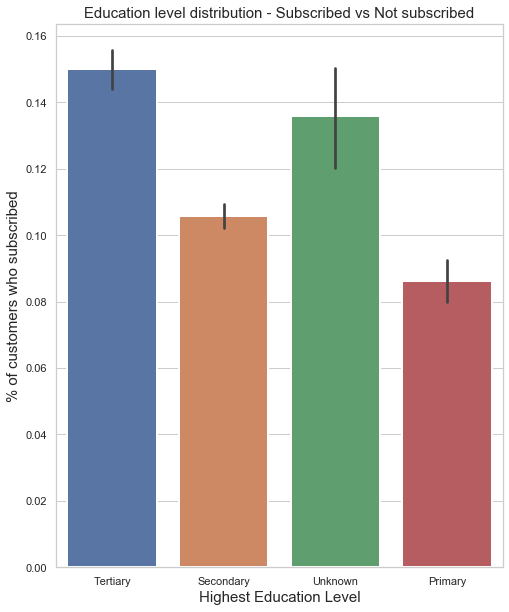

In [20]:
figure, education_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "education", 
            y = "subscribed", 
            estimator = np.mean,
            data=bank_df, 
            ax = education_bar,
            linewidth=2)
education_bar.set_title("Education level distribution - Subscribed vs Not subscribed", fontsize = 15)
education_bar.set_xlabel("Highest Education Level", fontsize = 15);
education_bar.set_ylabel("% of customers who subscribed", fontsize = 15);
labels = ['Tertiary', 'Secondary', 'Unknown', 'Primary']
val = ['tertiary','secondary','unknown', 'primary']
education_bar.set_xticklabels(labels);

The above chart shows that most subscribers completed tertiary education

#### Housing against the subscription class

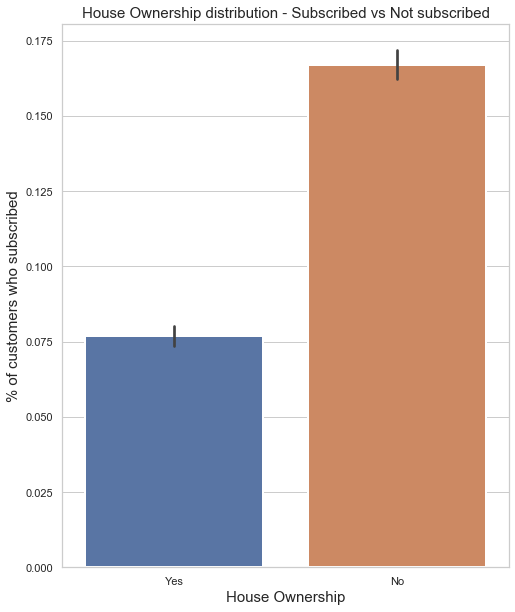

In [21]:
figure, housing_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "housing", 
            y = "subscribed", 
            estimator = np.mean,
            data=bank_df, 
            ax = housing_bar,
            linewidth=2)
housing_bar.set_title("House Ownership distribution - Subscribed vs Not subscribed", fontsize = 15)
housing_bar.set_xlabel("House Ownership", fontsize = 15);
housing_bar.set_ylabel("% of customers who subscribed", fontsize = 15);
labels = ['Yes', 'No']
val = ['yes','no']
housing_bar.set_xticklabels(labels);

#### Loan vs subscription distribution

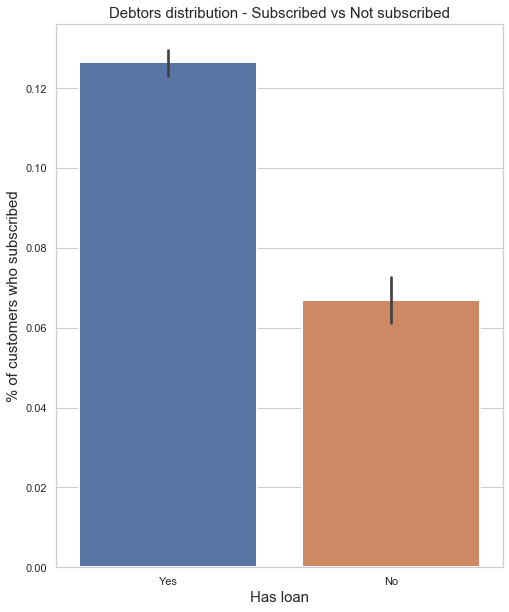

In [22]:
figure, loan_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "loan", 
            y = "subscribed", 
            estimator = np.mean,
            data=bank_df, 
            ax = loan_bar,
            linewidth=2)
loan_bar.set_title("Debtors distribution - Subscribed vs Not subscribed", fontsize = 15)
loan_bar.set_xlabel("Has loan", fontsize = 15);
loan_bar.set_ylabel("% of customers who subscribed", fontsize = 15);
labels = ['Yes', 'No']
val = ['yes','no']
loan_bar.set_xticklabels(labels);

Majority of those who subscribed for a term loan do not own a house.

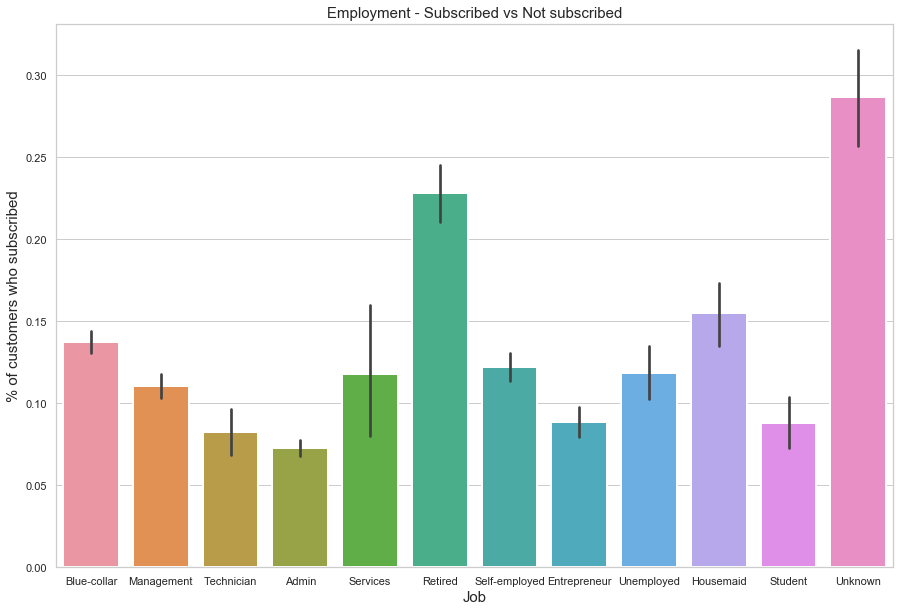

In [23]:
figure, job_bar = plt.subplots(figsize = (15,10))
sns.barplot(x = "job", 
            y = "subscribed", 
            estimator = np.mean,
            data=bank_df, 
            ax = job_bar,
            linewidth=2)
job_bar.set_title("Employment - Subscribed vs Not subscribed", fontsize = 15)
job_bar.set_xlabel("Job", fontsize = 15);
job_bar.set_ylabel("% of customers who subscribed", fontsize = 15);
labels = ['Blue-collar', 'Management', 'Technician', 'Admin', 'Services', 'Retired', 'Self-employed', 'Entrepreneur', 'Unemployed', 'Housemaid', 'Student', 'Unknown']
val = ['blue-collar', 'management', 'technician', 'admin', 'services', 'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid', 'student', 'unknown']
job_bar.set_xticklabels(labels);

The above chart shows that most of those who indicated unknown jobs, subscribed to a term loan, followed by the retired.

Text(0.5, 0.98, 'Distribution of subscribers marital status and the highest level of education')

Text(0.0, 0.06486217675475987, '12.972%')

Text(1.0, 0.09181969949916527, '18.364%')

Text(2.0, 0.0690006798096533, '13.800%')

Text(0.0, 0.04734931009440813, '9.470%')

Text(1.0, 0.06460631706211274, '12.921%')

Text(2.0, 0.051687388987566606, '10.337%')

Text(0.0, 0.061206896551724135, '12.241%')

Text(1.0, 0.08143939393939394, '16.288%')

Text(2.0, 0.07100591715976332, '14.201%')

Text(0.0, 0.03774304231795654, '7.549%')

Text(1.0, 0.053341148886283704, '10.668%')

Text(2.0, 0.06914893617021277, '13.830%')

Text(-0.2666666666666667, 0.06486217675475987, '12.972%')

Text(0.7333333333333333, 0.04734931009440813, '9.470%')

Text(1.7333333333333334, 0.061206896551724135, '12.241%')

Text(2.7333333333333334, 0.03774304231795654, '7.549%')

Text(0.0, 0.09181969949916527, '18.364%')

Text(1.0, 0.06460631706211274, '12.921%')

Text(2.0, 0.08143939393939394, '16.288%')

Text(3.0, 0.053341148886283704, '10.668%')

Text(0.2666666666666667, 0.0690006798096533, '13.800%')

Text(1.2666666666666666, 0.051687388987566606, '10.337%')

Text(2.2666666666666666, 0.07100591715976332, '14.201%')

Text(3.2666666666666666, 0.06914893617021277, '13.830%')

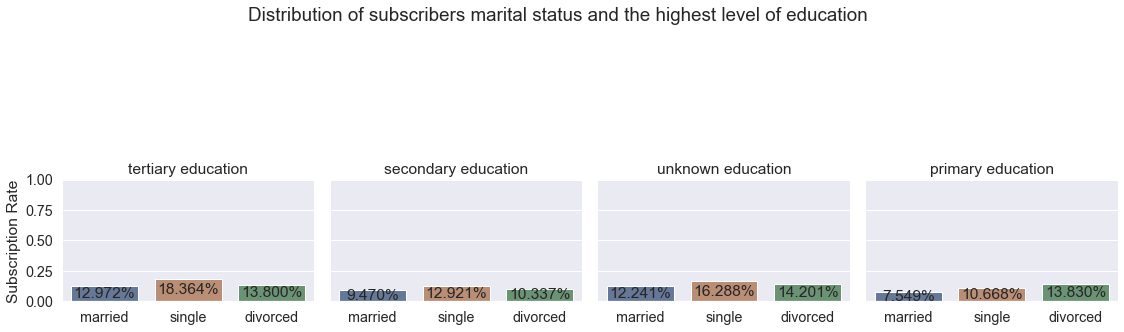

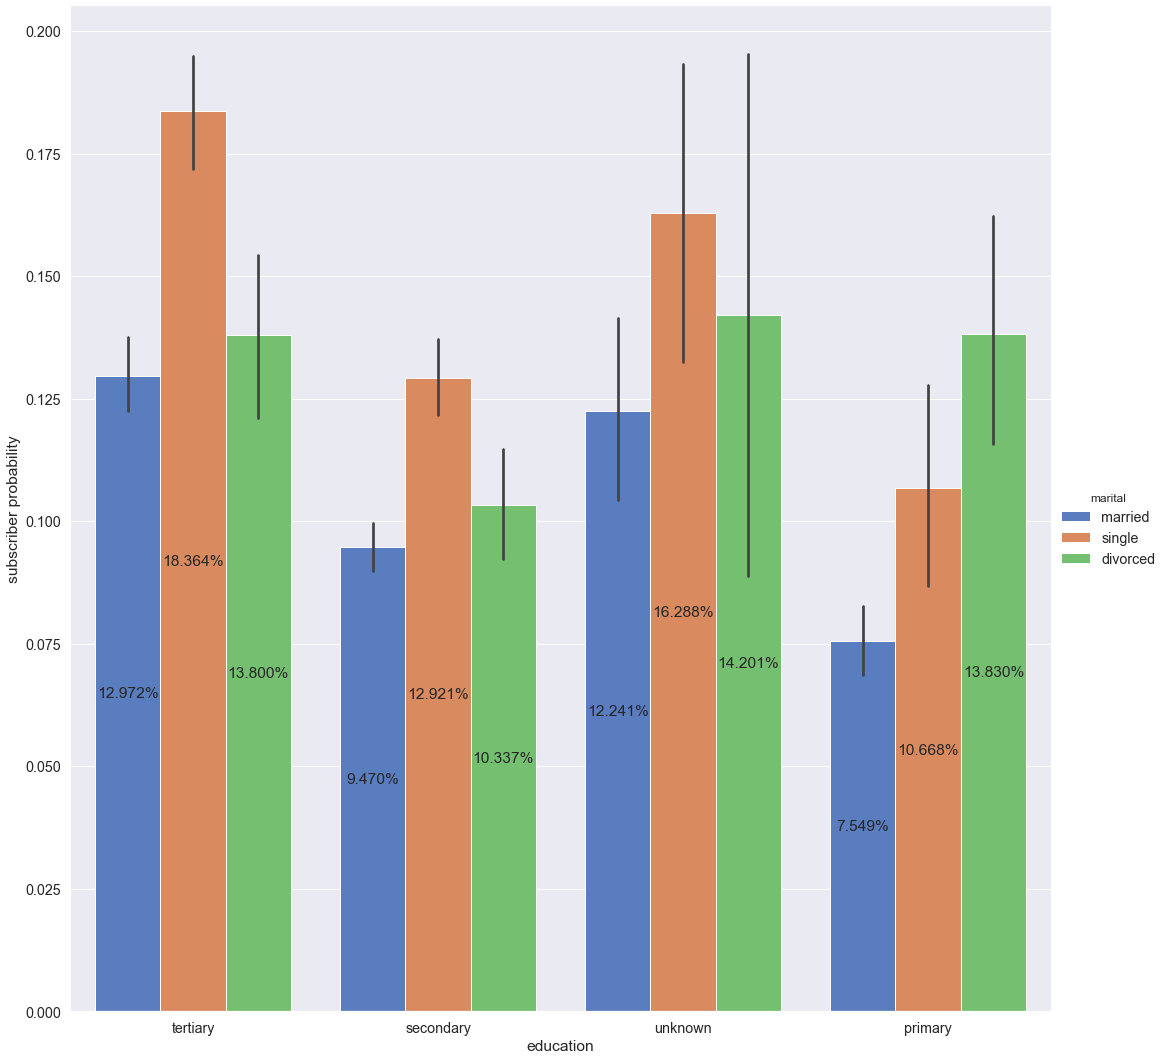

In [24]:
sns.set(font_scale=1.3)
g = sns.catplot(x="marital", y="subscribed", col="education",
                    data=bank_df, saturation=.5,
                    kind="bar", ci=None, aspect=.8)
(g.set_axis_labels("", "Subscription Rate")
    .set_xticklabels(["married", "single", "divorced"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.5)
g.fig.suptitle('Distribution of subscribers marital status and the highest level of education');

for myaxis in g.axes[0]:
    for patch in myaxis.patches:
        label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
        label_y = patch.get_y() + patch.get_height()/2
        myaxis.text(label_x, label_y,
                    #left - freq below - rel freq wrt population as a percentage
                    '{:.3%}'.format(patch.get_height()),
                   horizontalalignment='center', verticalalignment='center')
        #Another plot that gives the exact same result is as follows: It is good to know different variations.


g = sns.factorplot(x="education", y="subscribed", hue="marital", data=bank_df,
                   size=15, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("subscriber probability")

myaxis = g.ax
for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

Text(0.5, 0.98, 'Distribution of subscribers marital status and their jobs')

Text(0.0, 0.06305555555555556, '12.611%')

Text(1.0, 0.08109942314217848, '16.220%')

Text(2.0, 0.0639063906390639, '12.781%')

Text(0.0, 0.05133267522211254, '10.267%')

Text(1.0, 0.06622137404580153, '13.244%')

Text(2.0, 0.04162162162162162, '8.324%')

Text(0.0, 0.03785046728971963, '7.570%')

Text(1.0, 0.05672268907563025, '11.345%')

Text(2.0, 0.04189944134078212, '8.380%')

Text(0.0, 0.03135763490241102, '6.272%')

Text(1.0, 0.0528798411122145, '10.576%')

Text(2.0, 0.03866666666666667, '7.733%')

Text(0.0, 0.05172413793103448, '10.345%')

Text(1.0, 0.08823529411764706, '17.647%')

Text(2.0, 0.029411764705882353, '5.882%')

Text(0.0, 0.11034084344309647, '22.068%')

Text(1.0, 0.06018518518518518, '12.037%')

Text(2.0, 0.1423529411764706, '28.471%')

Text(0.0, 0.05681396212402525, '11.363%')

Text(1.0, 0.06799768518518519, '13.600%')

Text(2.0, 0.06, '12.000%')

Text(0.0, 0.03697548815953469, '7.395%')

Text(1.0, 0.05884808013355593, '11.770%')

Text(2.0, 0.04553734061930783, '9.107%')

Text(0.0, 0.039778449144008056, '7.956%')

Text(1.0, 0.09641255605381166, '19.283%')

Text(2.0, 0.07857142857142857, '15.714%')

Text(0.0, 0.06634746922024624, '13.269%')

Text(1.0, 0.09725685785536159, '19.451%')

Text(2.0, 0.07894736842105263, '15.789%')

Text(0.0, 0.03673245614035088, '7.346%')

Text(1.0, 0.08333333333333333, '16.667%')

Text(2.0, 0.04891304347826087, '9.783%')

Text(0.0, 0.09259259259259259, '18.519%')

Text(1.0, 0.1469248291571754, '29.385%')

Text(2.0, 0.08333333333333333, '16.667%')

Text(-0.2666666666666667, 0.06305555555555556, '12.611%')

Text(0.7333333333333333, 0.05133267522211254, '10.267%')

Text(1.7333333333333334, 0.03785046728971963, '7.570%')

Text(2.7333333333333334, 0.03135763490241102, '6.272%')

Text(3.7333333333333334, 0.05172413793103448, '10.345%')

Text(4.733333333333333, 0.11034084344309647, '22.068%')

Text(5.733333333333333, 0.05681396212402525, '11.363%')

Text(6.733333333333333, 0.03697548815953469, '7.395%')

Text(7.733333333333333, 0.039778449144008056, '7.956%')

Text(8.733333333333333, 0.06634746922024624, '13.269%')

Text(9.733333333333333, 0.03673245614035088, '7.346%')

Text(10.733333333333333, 0.09259259259259259, '18.519%')

Text(0.0, 0.08109942314217848, '16.220%')

Text(1.0, 0.06622137404580153, '13.244%')

Text(2.0, 0.05672268907563025, '11.345%')

Text(3.0, 0.0528798411122145, '10.576%')

Text(4.0, 0.08823529411764706, '17.647%')

Text(5.0, 0.06018518518518518, '12.037%')

Text(6.0, 0.06799768518518519, '13.600%')

Text(7.0, 0.05884808013355593, '11.770%')

Text(8.0, 0.09641255605381166, '19.283%')

Text(9.0, 0.09725685785536159, '19.451%')

Text(10.0, 0.08333333333333333, '16.667%')

Text(11.0, 0.1469248291571754, '29.385%')

Text(0.2666666666666667, 0.0639063906390639, '12.781%')

Text(1.2666666666666666, 0.04162162162162162, '8.324%')

Text(2.2666666666666666, 0.04189944134078212, '8.380%')

Text(3.2666666666666666, 0.03866666666666667, '7.733%')

Text(4.266666666666667, 0.029411764705882353, '5.882%')

Text(5.266666666666667, 0.1423529411764706, '28.471%')

Text(6.266666666666667, 0.06, '12.000%')

Text(7.266666666666667, 0.04553734061930783, '9.107%')

Text(8.266666666666667, 0.07857142857142857, '15.714%')

Text(9.266666666666667, 0.07894736842105263, '15.789%')

Text(10.266666666666667, 0.04891304347826087, '9.783%')

Text(11.266666666666667, 0.08333333333333333, '16.667%')

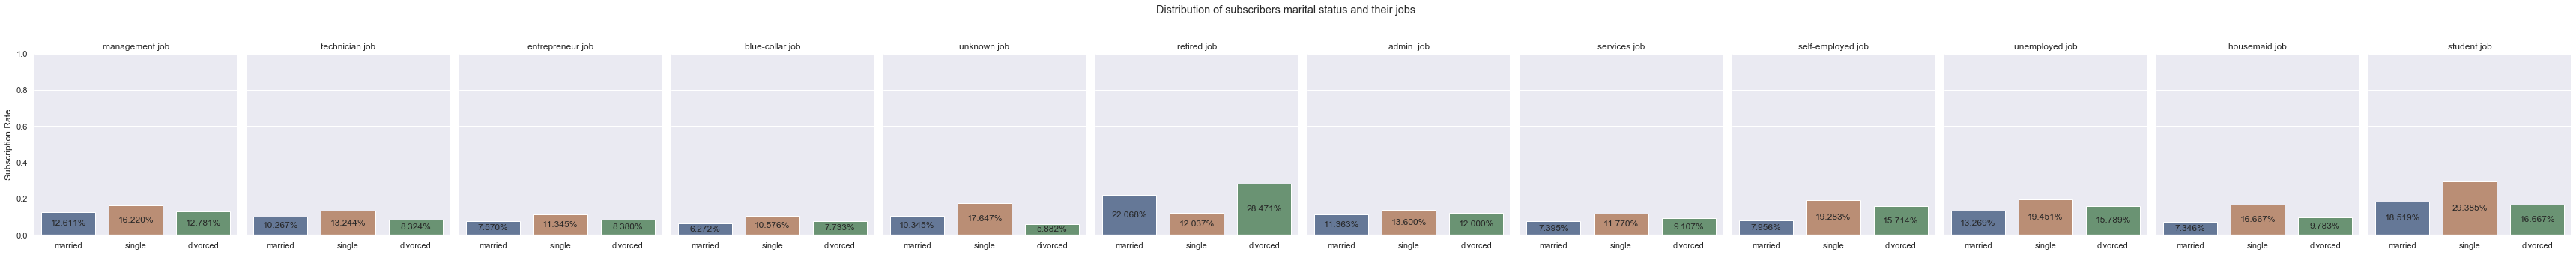

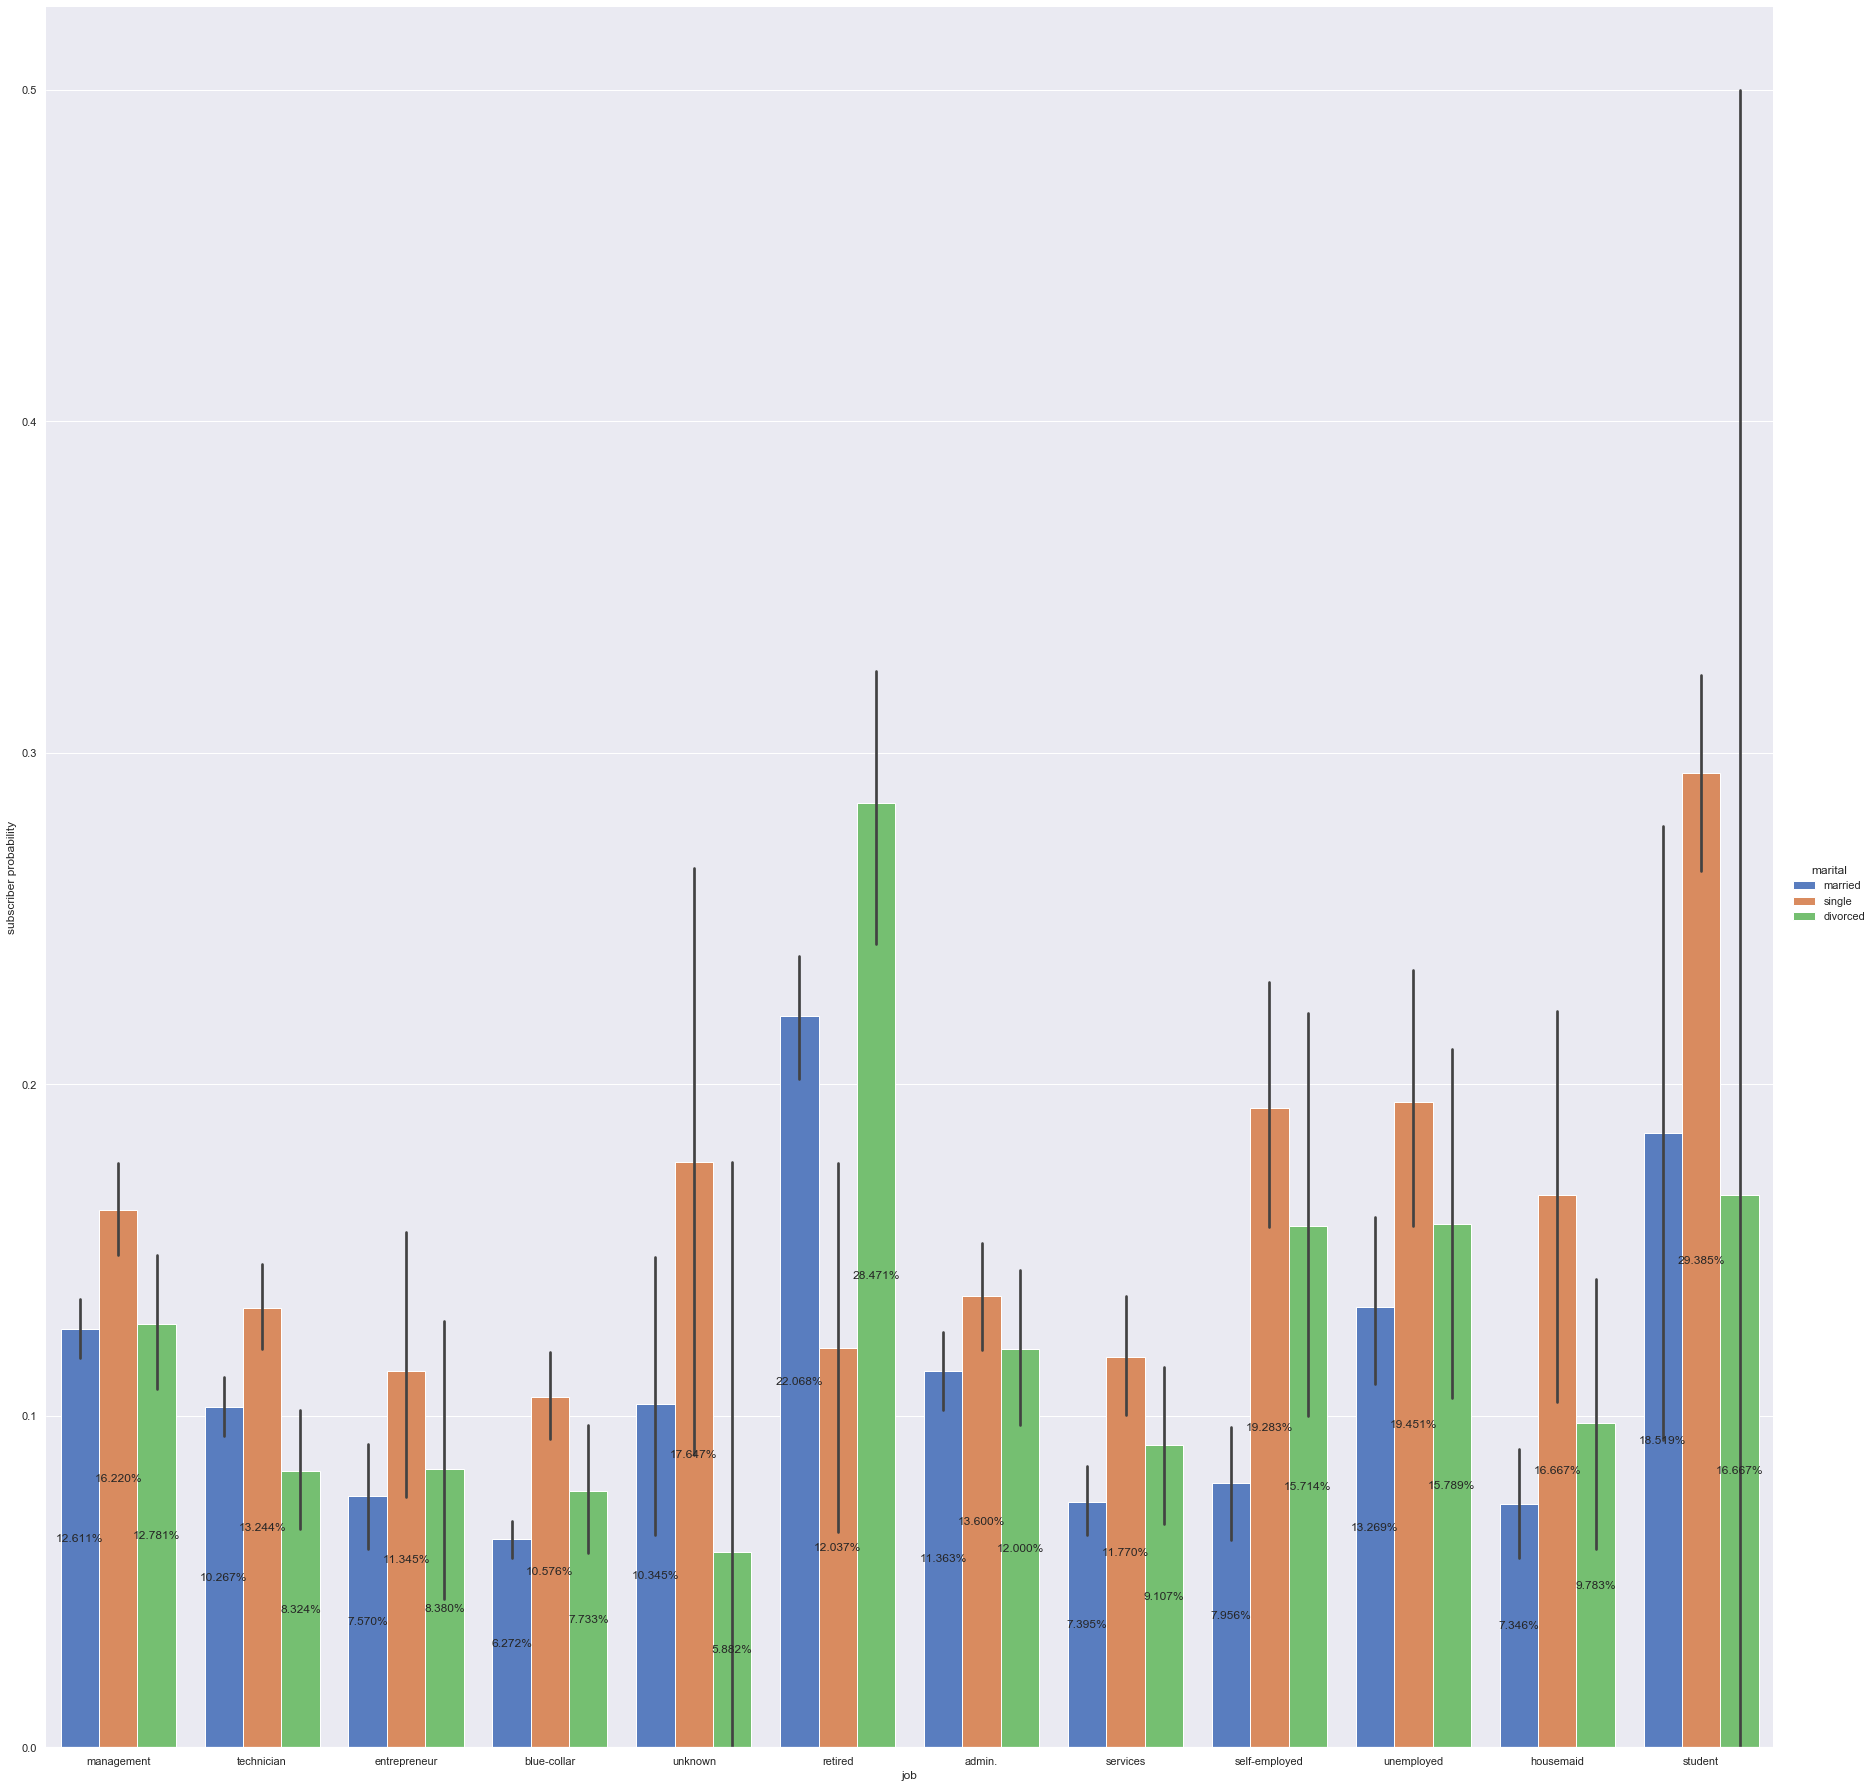

In [25]:
sns.set(font_scale=1)
g = sns.catplot(x="marital", y="subscribed", col="job",
                    data=bank_df, saturation=.5,
                    kind="bar", ci=None, aspect=.8)
(g.set_axis_labels("", "Subscription Rate")
    .set_xticklabels(["married", "single", "divorced"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)

g.fig.suptitle('Distribution of subscribers marital status and their jobs' );
for myaxis in g.axes[0]:
    for patch in myaxis.patches:
        label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
        label_y = patch.get_y() + patch.get_height()/2
        myaxis.text(label_x, label_y,
                    #left - freq below - rel freq wrt population as a percentage
                    '{:.3%}'.format(patch.get_height()),
                   horizontalalignment='center', verticalalignment='center')
        #Another plot that gives the exact same result is as follows: It is good to know different variations.


g = sns.factorplot(x="job", y="subscribed", hue="marital", data=bank_df,
                   size=25, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("subscriber probability")

myaxis = g.ax
for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')


From the above exploration and analysis, it can be concluded that most of the features which have an influence on whether the client will subscribe or not are categorical. We can see that the job, education level, house ownership and marital status show us the sorts of pattern in the dataset we want to see.

### Feature Engineering and Selection

#### Outliers

It is important to pay attention to outliers because they affect the mean and median which in turn affects the error (absolute and mean) in any data set. This might result to deviations when the error is plotted

In [26]:
from collections import Counter

def detect_outliers(df, n, features):
    outliers_indices = [] #create a empty list to keep track of the passenger row number.
    for col in features:
        # 1st quartile (25%)
        Q1 = np.nanpercentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.nanpercentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)
                              | (df[col] > Q3 + outlier_step)].index
        
        #print(df[(df[col] < Q1 - outlier_step)
                              #| (df[col] > Q3 + outlier_step)].index)
        print(col,Q1-outlier_step,Q3+outlier_step)
        # append the found outlier indices for col to the list of outlier indices
        outliers_indices.extend(outlier_list_col)
        
    #print(outliers_indices)
    
    # select observations containing more than 2 outliers
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(k for k, v in outliers_indices.items() if v > n)
    #print(outliers_indices)
    
    return multiple_outliers


Outliers_to_drop = detect_outliers(bank_df, 2, ["age", "balance", "campaign"])

age 10.5 70.5
balance -1962.0 3462.0
campaign -2.0 6.0


In [27]:
Outliers_to_drop

bank_df.loc[Outliers_to_drop]

[31285, 40471, 42419, 43299, 43537]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31285,79,retired,married,secondary,no,8304,no,no,telephone,9,mar,303,9,-1,0,unknown,1
40471,71,self-employed,married,secondary,no,5946,no,no,cellular,3,jul,59,7,-1,0,unknown,0
42419,73,retired,divorced,primary,no,5028,no,no,cellular,4,dec,696,10,-1,0,unknown,1
43299,71,retired,married,tertiary,no,3561,no,no,telephone,15,mar,577,7,-1,0,unknown,1
43537,80,retired,divorced,primary,no,5861,no,no,telephone,26,apr,92,8,-1,0,unknown,0


From the result of the above function, we can see that there are only 5 outliers from the entire dataset. This is pretty insignificant given the size of the dataset.

### Data balancing

As stated somewhere above, there data is extremely imbalance since the ratio between the two binary classes is very high. Inorder to balance the data, we will be doing some random oversampling whereby random dulicates from the minority class will be inputed into the dataset. This is has its downsides as it can lead overfitting.

We are going to be making a copy of the data before balancing so we can test our model against both versions.

In [28]:
bank_df2 = bank_df.copy()

In [29]:
target_count = bank_df2['subscribed'].value_counts()
target_count

0    39922
1     5289
Name: subscribed, dtype: int64

In [30]:
unsubscribed_count = target_count[0]
unsubscribed_count

39922

Random over-sampling:
1    39922
0    39922
Name: subscribed, dtype: int64


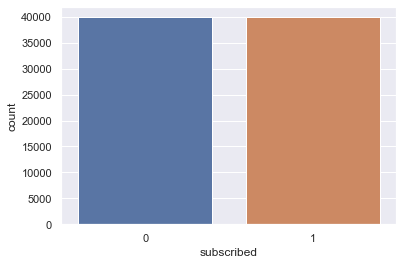

In [31]:
subscribed1 = bank_df2[bank_df2['subscribed'] == 1]
unsubscribed = bank_df2[bank_df2['subscribed'] == 0]

subscribed_over= subscribed1.sample(unsubscribed_count, replace=True)
oversampled_df = pd.concat([unsubscribed, subscribed_over], axis=0)

print('Random over-sampling:')
print(oversampled_df.subscribed.value_counts())

sns_plot =sns.countplot(x='subscribed',data=oversampled_df)

### Data encoding

In this stage the categorical variables are converted to dummy variables for mathematical analysis. We will be using one-hot encoding to since the variables have a non-ordinal relation. It is important to note that one-hot encoding comes with its caveat such as the one-hot encoder in the Sklearn package in python, Sklearn’s one hot encoder does not actually know how to convert categories to numbers.

In [32]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for feature in categorical_features:
    dummies = pd.get_dummies(bank_df2[feature]).add_prefix(feature + '_')
    bank_df2 = bank_df2.join(dummies)
    
bank_df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Dropping columns

We will be dropping the categorical columns we already encoded.

In [33]:
columns_to_drop = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
bank_df2.drop(columns_to_drop, axis=1, inplace = True)

In [34]:
#Separating the independent and dependent variables
df_without_class = bank_df2.drop('subscribed', axis=1)
df_with_class_only = bank_df2['subscribed']

### Machine Learning Modelling

In [35]:
#importing from sklearn
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
from sklearn.metrics import mean_absolute_error, accuracy_score

#### Train - Test split

Here, we split the data into training and testing sets

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
    df_without_class, df_with_class_only, train_size=0.8, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(36168, 51) (36168,)
(9043, 51) (9043,)


The training data was split into 4 datasets, x_train being the training set without the target outcome(no subscribed column).
y_train is the set of target values corresponding to the x_train set.
The test set is also extracted from the dataset with x_text being the test set without the target outcome while y_test set is the set of subscribed values corresponding to the x_test set

#### Feature Scaling

In [37]:
# We will be using standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
x_train = sc.fit_transform(x_train)
## transforming "test_x"
x_test = sc.transform(x_test)

#### Logistic Regression

In [38]:
#Call the model object
logreg = LogisticRegression()

#Fit the model with "train_x" and "train_y"
logreg.fit(x_train,y_train)


## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(x_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))

LogisticRegression()

So, Our accuracy Score is: 0.8985956


#### Confusion Matrix

In [39]:
def confusion_matrix_model(model):
    cm=confusion_matrix(y_test,model.predict(x_test))
    col=["Predicted Not Subscribed","Predicted Subscribed"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Not Subscribed","Predicted Subscribed"]
    cm.index=["Actual not-subscribed","Actual subscribed"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm



confusion_matrix_model(logreg)

,Predicted Not Subscribed,Predicted Subscribed
Actual not-subscribed,0.97,0.03
Actual subscribed,0.65,0.35


In [41]:
accuracy_score(y_test, y_pred)
accuracy_score(y_train, logreg.predict(x_train))
print(classification_report(y_test,y_pred))

0.898595598805706

0.9030081840300819

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.35      0.45      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



#### ROC Curve 

The concept of ROC and AUC builds upon the knowledge of Confusion Matrix, Specificity and Sensitivity.

LogisticRegression auc is 0.89646423


<Figure size 720x648 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC for Logistic Regression (Bank Term Deposit Subscription)')

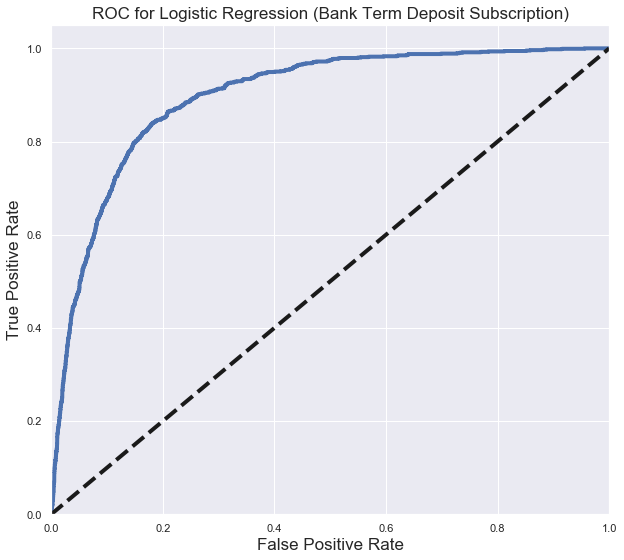

In [42]:
from sklearn.metrics import roc_curve, auc
y_score = logreg.decision_function(x_test) 

FPR, TPR, THR = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (logreg.__class__.__name__+" auc is %2.8f" % ROC_AUC) #Gives AUC score.


plt.figure(figsize =[10,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.title('ROC for Logistic Regression (Bank Term Deposit Subscription)', fontsize= 17)
plt.show()

<Figure size 792x648 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Recall Curve for bank term deposit subscribers')

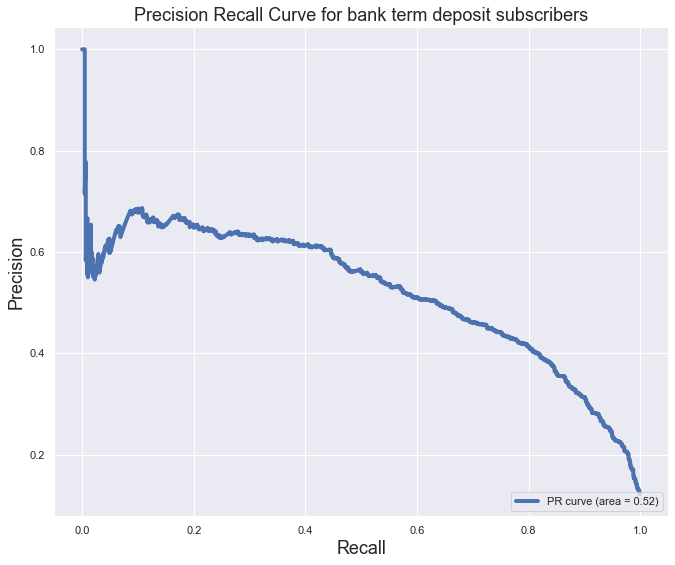

In [43]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for bank term deposit subscribers', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine

In [44]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [45]:
predictions = svc_model.predict(x_test)

In [46]:
confusion_matrix_model(svc_model)

,Predicted Not Subscribed,Predicted Subscribed
Actual not-subscribed,0.97,0.03
Actual subscribed,0.66,0.34


In [47]:
accuracy_score(y_test, predictions)
accuracy_score(y_train, svc_model.predict(x_train))
print(classification_report(y_test,predictions))

0.8971580227800509

0.920205706702057

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.61      0.34      0.44      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

